<a href="https://colab.research.google.com/github/samsyano/Titanic-Survival-Classification/blob/master/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:

dataset = sns.load_dataset('titanic')
# dataset = pd.read_csv("train_and_test2.csv")
dataset.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
dataset.shape

(891, 15)

In [ ]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Identify the number of survivors
dataset['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


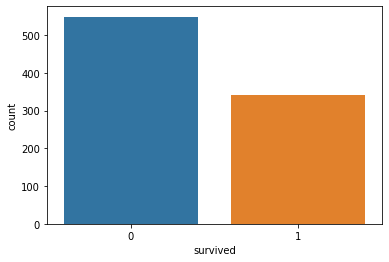

In [ ]:
# Visualize survival data
sns.countplot(dataset ['survived'])

In [ ]:

dataset.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
dataset['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

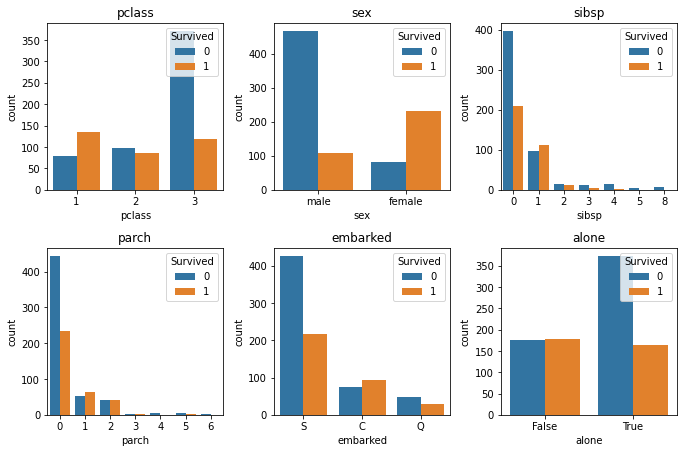

In [ ]:
# visualize all the datasets

cols = ['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'alone']

n_cols = 3
n_rows = 2

# subplot grid, 

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *3.2, n_rows*3.2))

for r in range(0, n_rows):
  for c in range(0, n_cols):
    i = r*n_cols + c # index to go through the number of columns
    ax = axs[r][c] # show where to position each sub plot
    sns.countplot (dataset[cols[i]], hue=dataset['survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Survived', loc='upper right')
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


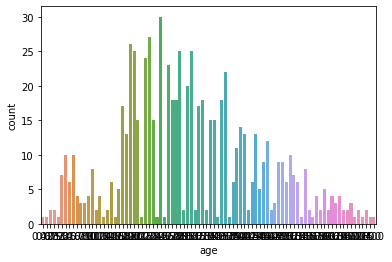

In [ ]:
# dataset['age'].value_counts()
sns.countplot(dataset ['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


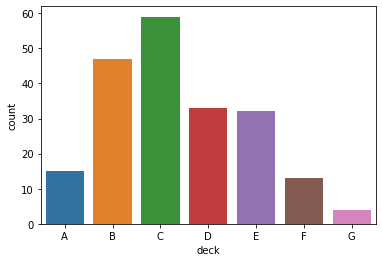

In [ ]:

sns.countplot(dataset ['deck'])

In [ ]:
dataset.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
dataset.groupby('deck')[['survived']].mean()

,survived
deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000


In [ ]:
dataset.pivot_table('survived', index='sex', columns='pclass')

pclass,1,2,3
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


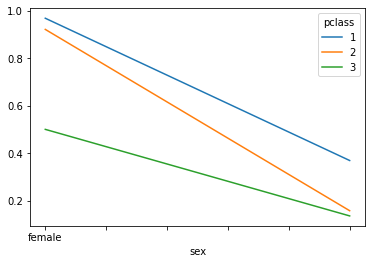

In [ ]:
dataset.pivot_table('survived', index='sex', columns='pclass').plot()

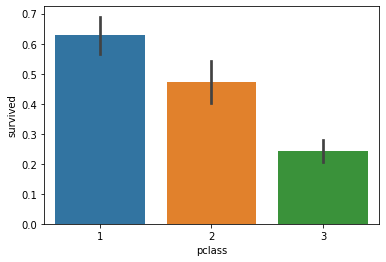

In [ ]:
# plot the survival rate of each class
sns.barplot(x='pclass', y='survived', data=dataset)

In [ ]:
# r = [0, 18, 45, 65, 100]
# g = [0,1,2,3]

# age = pd.cut(dataset['age'], bins = r, labels = g)

In [ ]:
dataset.pivot_table('survived', ['embarked'], 'pclass')

pclass,1,2,3
embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


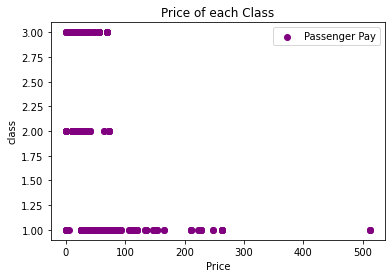

In [ ]:
# plot the prices paid for each class

plt.scatter(dataset['fare'], dataset['pclass'], color='purple', label='Passenger Pay')
plt.ylabel('class')
plt.xlabel('Price')
plt.title('Price of each Class')
plt.legend()
plt.show()

In [ ]:
dataset['pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64

In [ ]:
dataset.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# lookup all the values in each column & get count

# for val in dataset:
#   print(dataset[val].value_counts())
#   print()

In [ ]:
# dataset.info()
dataset.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [ ]:
# dataset['age'] = age

In [ ]:
dataset.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:


# drop missing numbers
dataset = dataset.dropna(subset = ['embarked', 'age'])

# drop some column
dataset = dataset.drop(['fare', 'deck', 'embark_town', 'alive', 'who', 'alone' , 'adult_male', 'class'], axis=1)

In [ ]:
dataset.shape

(712, 7)

In [ ]:
dataset.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
embarked     object
dtype: object

In [ ]:
dataset.head(5) 

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Encode the sex column
dataset.iloc[:, 2] = labelencoder.fit_transform(dataset.iloc[:, 2].values)

# Encode the embarked column
dataset.iloc[:, 6] = labelencoder.fit_transform(dataset.iloc[:, 6].values)


In [ ]:
# print the unique values in the columns
print(dataset['sex'].unique())
print(dataset['embarked'].unique())
# print(dataset['alone'].unique())

[1 0]
[2 0 1]


In [ ]:
x_col = dataset.iloc[:, 1:8]
y_col = dataset.iloc[:, 0]

x = x_col.values
y = y_col.values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
# scale the data
from sklearn.preprocessing import StandardScaler

def scale_data(dataset):
  sc = StandardScaler()
  d_set = sc.fit_transform(dataset)
  return d_set
  # x_test = sc.fit_transform(x_test)



x_train = scale_data(x_train)
x_test = scale_data(x_test)


In [ ]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest


In [ ]:
model = models(x_train, y_train)

[0]Logistic Regression Training Accuracy: 0.8089887640449438
[1]K Nearest Neighbor Training Accuracy: 0.8632958801498127
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7827715355805244
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.848314606741573
[4]Gaussian Naive Bayes Training Accuracy: 0.7902621722846442
[5]Decision Tree Classifier Training Accuracy: 0.9531835205992509
[6]Random Forest Classifier Training Accuracy: 0.9419475655430711


In [ ]:
# show the confusion matrix and accuracy for all the models

from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(x_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()# Print a new line

[[91 13]
 [23 51]]
Model[0] Testing Accuracy = "0.797752808988764 !"

[[81 23]
 [22 52]]
Model[1] Testing Accuracy = "0.7471910112359551 !"

[[86 18]
 [23 51]]
Model[2] Testing Accuracy = "0.7696629213483146 !"

[[92 12]
 [23 51]]
Model[3] Testing Accuracy = "0.8033707865168539 !"

[[82 22]
 [25 49]]
Model[4] Testing Accuracy = "0.7359550561797753 !"

[[74 30]
 [20 54]]
Model[5] Testing Accuracy = "0.7191011235955056 !"

[[76 28]
 [22 52]]
Model[6] Testing Accuracy = "0.7191011235955056 !"



In [ ]:
forest = model[5]
importances = pd.DataFrame({'feature':dataset.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,feature,importance
0,pclass,0.155
1,sex,0.256
2,age,0.394
3,sibsp,0.104
4,parch,0.046
5,embarked,0.046


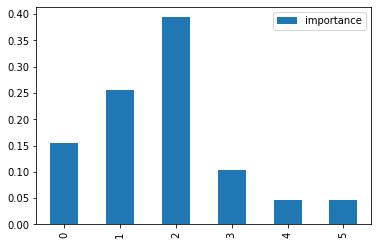

In [ ]:
importances.plot.bar()

In [ ]:
pred = model[3].predict(x_test)
print(pred)
#Print a space
print()
#Print the actual values
print(y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0]


In [ ]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [ ]:
my_survival = [[1, 0, 10, 1, 0, 2]]


my_survival_scaled = scale_data(my_survival)

#Print Prediction of Random Forest Classifier model
pred = model[5].predict(my_survival_scaled)
print(pred)

if pred == 0:
  print('Oh no! You didn''t make it')
else:
  print('Nice! You survived')

[0]
Oh no! You didnt make it


In [ ]:
!pip install graphviz

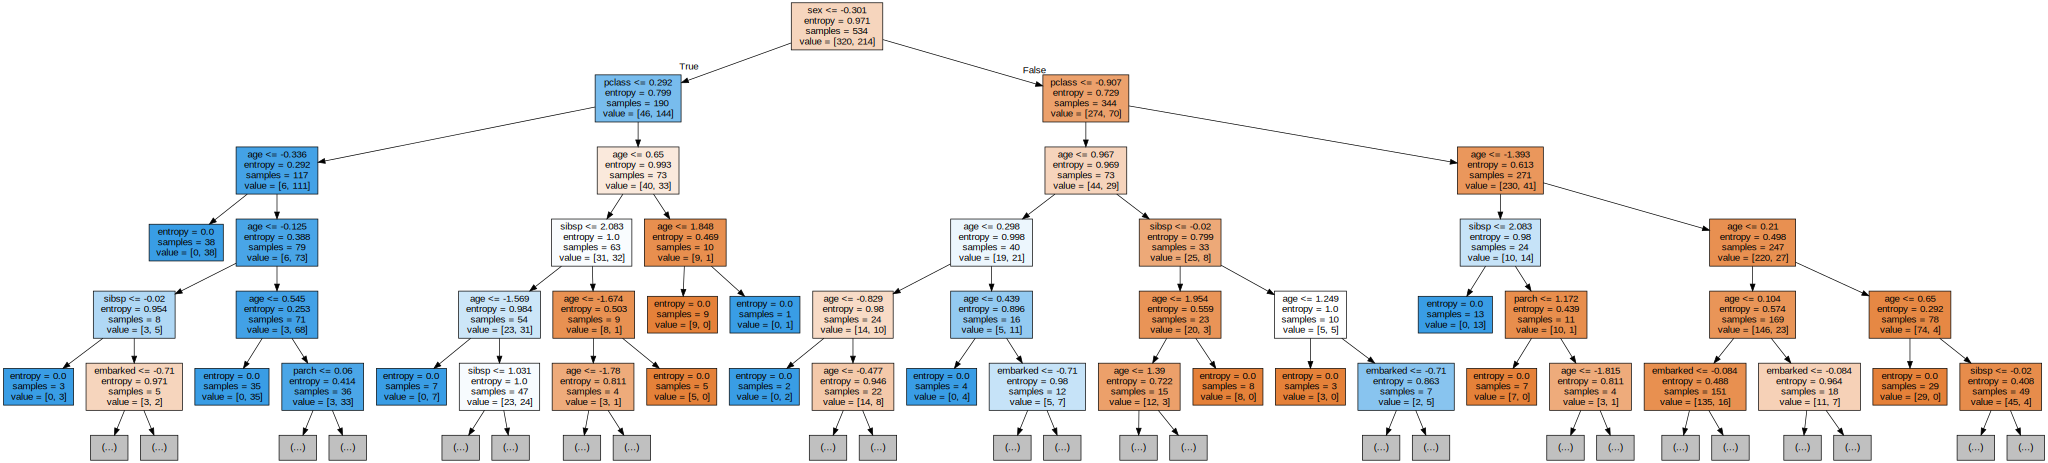

In [ ]:
from sklearn import tree
import graphviz
# DOT data
# graph = tree.export_graphviz(model[6], out_file='tree.dot', feature_names=x_train.columns, max_depth = 2, filled=True)

dot_data = tree.export_graphviz(model[5], out_file=None, 
                                feature_names=x_col.columns,  
                                max_depth=5,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
dataset.head(5)